In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns


In [2]:
train_data = pd.read_csv("fashion-mnist_train_data.csv")
test_data = pd.read_csv("fashion-mnist_test_data.csv")

In [3]:
X = train_data[train_data.columns[1:]]
y = train_data['label']

X_test = test_data[test_data.columns[1:]]
y_test = test_data['label']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=10_000, stratify=y,random_state=42)

In [5]:
X_train.reset_index(inplace=True,drop=True)
y_train = y_train.reset_index(drop=True)
X_val.reset_index(inplace=True,drop=True)
y_val = y_val.reset_index(drop=True)

In [6]:
y_cols = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

print("Length of train and validation set respectively: ")
len(X_train),len(X_val)

Length of train and validation set respectively: 


(50000, 10000)

In [7]:
def display_img(data_df:pd.DataFrame):
    display_df = data_df.sample(n=20)
    fig, axs = plt.subplots(4,5, figsize=(15, 6))
    fig.subplots_adjust(hspace = .5, wspace=.005)

    axs = axs.ravel()
    X_cols = display_df.columns[1:]
    for i in range(20):
        axs[i].imshow(np.expand_dims(display_df.iloc[i][X_cols].values,1).reshape((28,28)))
        axs[i].set_title(f"{y_cols[display_df.iloc[i]['label']]}")

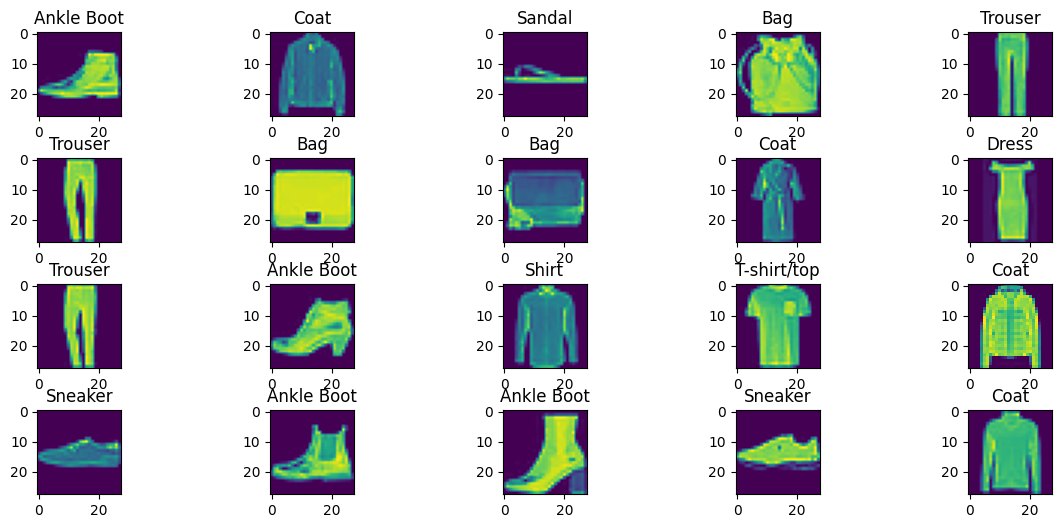

In [8]:
display_img(train_data)

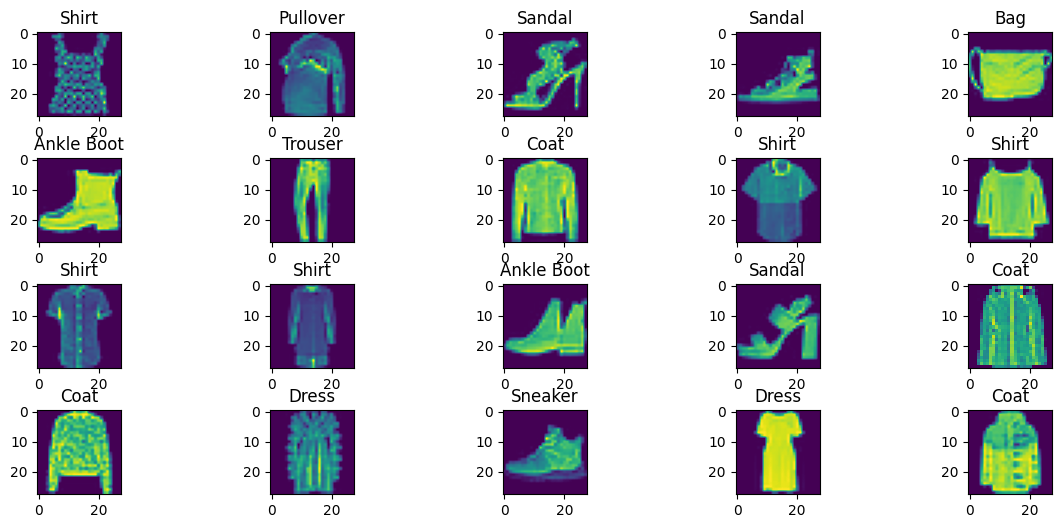

In [9]:
display_img(test_data)

## PCA

In [10]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
X_train_scaled = pca.fit_transform(X_train)
X_val_scaled = pca.fit_transform(X_val)

In [12]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)

In [13]:
req_comp = np.where(cum_var>=0.95)[0][0] + 1
print(f"The number of required PCA components: ",req_comp)

The number of required PCA components:  182


Text(0.5, 1.0, 'Explained Variance Plot')

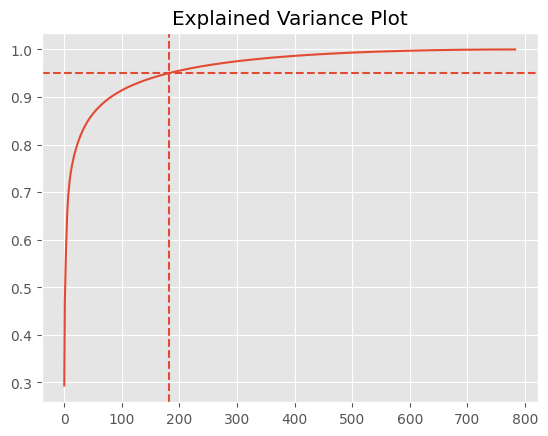

In [14]:
plt.style.use("ggplot")
plt.plot(cum_var)
plt.axhline(0.95,linestyle='--')
plt.axvline(req_comp,linestyle='--')
plt.title("Explained Variance Plot")

In [15]:
pca_trans = PCA(n_components=req_comp)
X_train_scaled = pca_trans.fit_transform(X_train,y_train)
X_val_scaled = pca_trans.fit_transform(X_val,y_val)
X_test_scaled = pca_trans.fit_transform(X_test,y_test)

In [16]:
X_recovered_train = pca_trans.inverse_transform(X_train_scaled)
X_recovered_val = pca_trans.inverse_transform(X_val_scaled)

## PLOTTING IMAGES AFTER PCA TRANSFORMATION

Text(0.5, 1.0, 'True Image | Label: Ankle Boot')

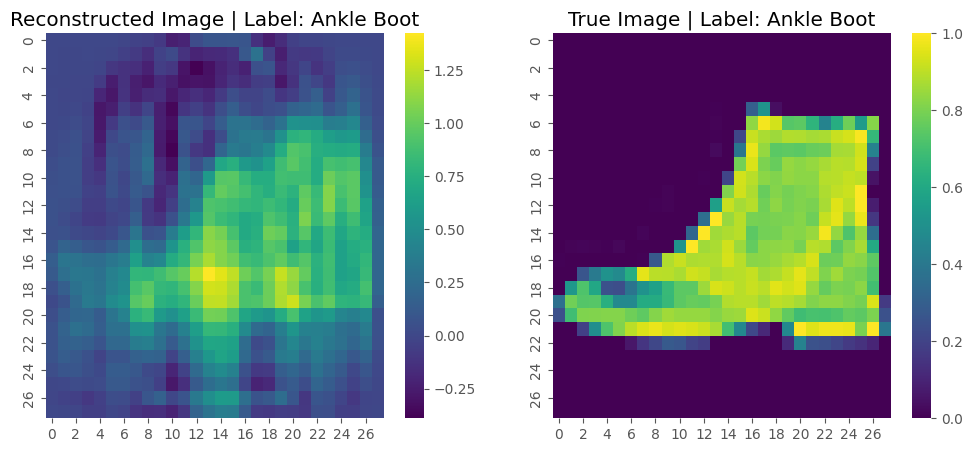

In [19]:
idx = 0
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(X_recovered_train[idx].reshape(28,28),ax=axs[0],cmap='viridis')
sns.heatmap(X_train.loc[idx].values.reshape(28,28),ax=axs[1],cmap='viridis')
axs[0].set_title(f"Reconstructed Image | Label: {y_cols[y_train[idx]]}")
axs[1].set_title(f"True Image | Label: {y_cols[y_train[idx]]}")

Text(0.5, 1.0, 'True Image | Label: Coat')

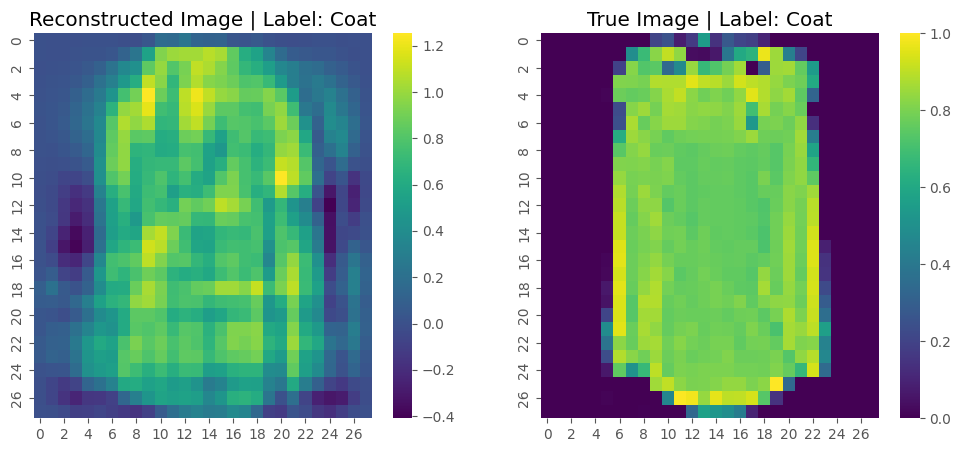

In [17]:
idx = 100
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(X_recovered_train[idx].reshape(28,28),ax=axs[0],cmap='viridis')
sns.heatmap(X_train.loc[idx].values.reshape(28,28),ax=axs[1],cmap='viridis')
axs[0].set_title(f"Reconstructed Image | Label: {y_cols[y_train[idx]]}")
axs[1].set_title(f"True Image | Label: {y_cols[y_train[idx]]}")

Text(0.5, 1.0, 'True Image | Label: Trouser')

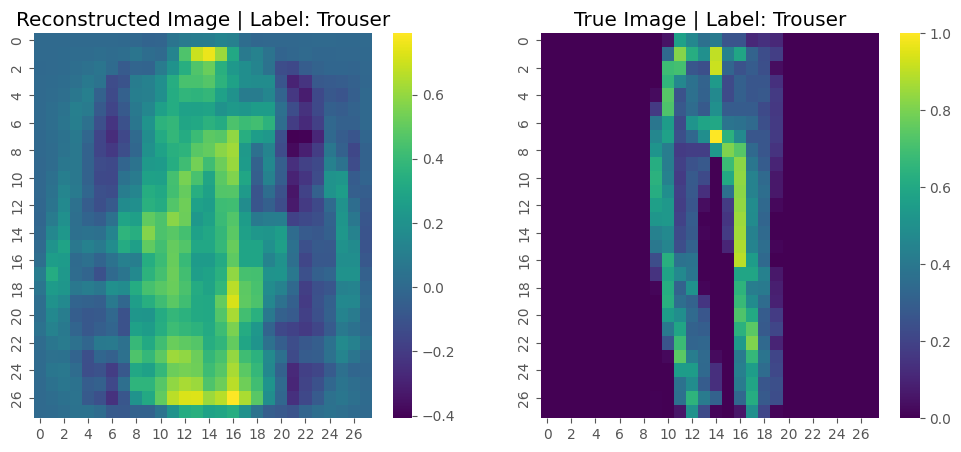

In [18]:
idx = 500
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(X_recovered_val[idx].reshape(28,28),ax=axs[0],cmap='viridis')
sns.heatmap(X_val.loc[idx].values.reshape(28,28),ax=axs[1],cmap='viridis')
axs[0].set_title(f"Reconstructed Image | Label: {y_cols[y_val[idx]]}")
axs[1].set_title(f"True Image | Label: {y_cols[y_val[idx]]}")

## LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000,n_jobs=-1,verbose=10)
softmax_reg.fit(X_train_scaled, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   verbose=10)

In [38]:
y_pred_val = softmax_reg.predict(X_val_scaled)

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [111]:
def get_acc(y_pred,y_true):
    acc = accuracy_score(y_true,y_pred)
    print("The accuracy: ",acc)

def display_cmf(y_pred,y_true):
    cm_train = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm_train, annot=True, fmt='g', cmap='twilight_shifted_r')

    # Set axis labels
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.show()

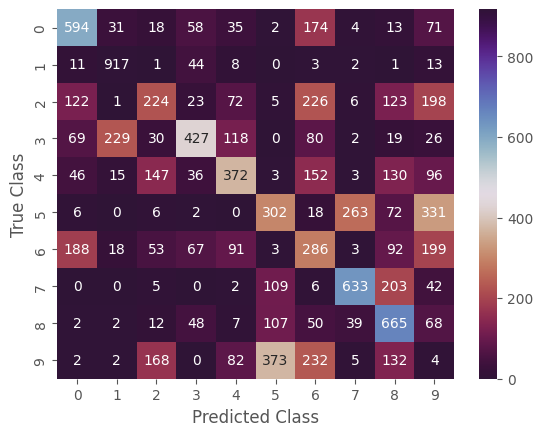

In [67]:
display_cmf(y_pred_val,y_val)

In [68]:
get_acc(y_pred_val,y_val)

The accuracy:  0.4424


In [71]:
C_list = [0.1,1.0,10.0,100.0]
train_C_dict = {}
val_C_dict = {}
for C in C_list:
    softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=C,max_iter=1000,n_jobs=-1,verbose=10)
    softmax_reg.fit(X_train_scaled,y_train)

    train_C_dict.update({C:softmax_reg.score(X_train_scaled,y_train)})
    val_C_dict.update({C:[softmax_reg.score(X_val_scaled,y_val),softmax_reg]})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   48.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.8min finished


<AxesSubplot:xlabel='C'>

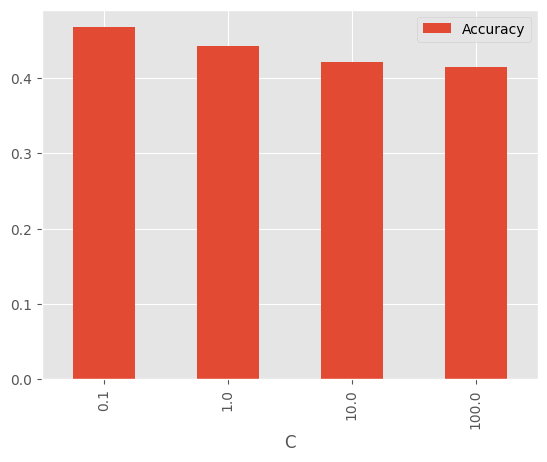

In [79]:
accs = [[val_C_dict[i][0],train_C_dict[i]] for i in val_C_dict]
c_df = pd.DataFrame([C_list,accs]).T
c_df.columns = ['C','Val Accuracy','Train Accuracy']
c_df.set_index('C',inplace=True)
c_df.plot.bar()

In [102]:
best_logistic_model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000,n_jobs=-1,verbose=10,C=0.1)
best_logistic_model.fit(X_train_scaled,y_train)
print("The accuracy on the train set: ",best_logistic_model.score(X_train_scaled,y_train))
print("The accuracy on the val set: ",best_logistic_model.score(X_val_scaled,y_val))
print("The accuracy on the test set: ",best_logistic_model.score(X_test_scaled,y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   45.6s finished


The accuracy on the train set:  0.86176
The accuracy on the val set:  0.4675
The accuracy on the test set:  0.5004


## SVM

In [17]:
from sklearn.svm import SVC

SVM = SVC(verbose=10,probability=True,kernel='rbf')
SVM.fit(X_train_scaled,y_train)

[LibSVM]

SVC(probability=True, verbose=10)

In [18]:
SVM.score(X_val_scaled,y_val)

0.5194

In [19]:
SVM.score(X_test_scaled,y_test)

0.5409

In [21]:
preds = SVM.predict_proba(X_val_scaled)
preds.shape

(10000, 10)

In [23]:
import optuna
from sklearn.exceptions import ConvergenceWarning

kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
C_list  = [0.1,1.0,10.0,100.0]
search_space= {
        "kernel":kernel_list,
        "C":C_list
    }

svm_train_scores_dict = {}
svm_val_scores_dict = {}

def objective(trial:optuna.Trial):
    kernel = trial.suggest_categorical("kernel",kernel_list)
    C = trial.suggest_categorical("C",C_list)
    svm = SVC(verbose=10,probability=False,kernel=kernel,C=C)

    svm.fit(X_train_scaled,y_train)
    train_acc = svm.score(X_train_scaled,y_train)
    val_acc = svm.score(X_val_scaled,y_val)

    key = kernel + '_' + str(C)
    svm_train_scores_dict.update({key:train_acc})
    svm_val_scores_dict.update({key:val_acc})

    return val_acc

grid_sampler = optuna.samplers.GridSampler(search_space=search_space)
study = optuna.create_study(sampler=grid_sampler,study_name="SVM Grid Search")
study.optimize(objective,catch=(ConvergenceWarning,))

[I 2023-02-25 15:18:05,604] A new study created in memory with name: SVM Grid Search


[LibSVM]

[W 2023-02-25 15:45:30,018] Trial 0 failed because of the following error: The number of the values 2 did not match the number of the objectives 1.


[LibSVM]

<AxesSubplot:>

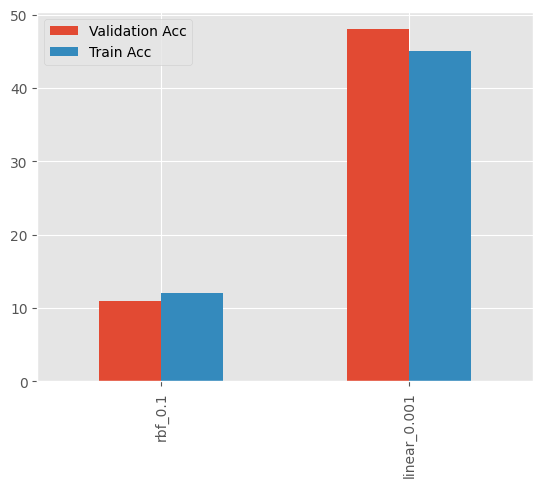

In [26]:
keys = svm_val_scores_dict.keys()

df_dict = {i:[svm_val_scores_dict[i],svm_train_scores_dict[i]] for i in svm_val_scores_dict}

svm_df = pd.DataFrame.from_dict(df_dict).T
svm_df.columns = ['Validation Acc','Train Acc']
svm_df.plot.bar()

In [ ]:
svm_trials_df = study.trials_dataframe()
svm_trials_df.to_csv('SVM_trials.csv')
svm_trials_df.sort_values(['value'],ascending=False).head(3)

In [ ]:
import joblib

joblib.dump(study,'svm_study.pkl')

In [ ]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
best_kernel = 'rbf'
best_C = 1.0


SVM = SVC(verbose=10,probability=True,kernel=best_kernel,C=best_C)
SVM.fit(X_train_scaled,y_train)

SVM.score(X_val_scaled,y_val)
SVM.score(X_test_scaled,y_test)

## RANDOM FORESTS

In [90]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
import optuna

param_grid = {
	'n_estimators': [ 50, 100, 150,200],
	'max_depth': [3,10,20,30],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [3, 6, 9],

}

rf_train_scores_dict = {}
rf_val_scores_dict = {}

def objective(trial:optuna.Trial):
    n_estimators = trial.suggest_categorical("n_estimators",param_grid['n_estimators'])
    max_depth = trial.suggest_categorical("max_depth",param_grid["max_depth"])
    max_features = trial.suggest_categorical("max_features",param_grid["max_features"])
    max_leaf_nodes = trial.suggest_categorical("max_leaf_nodes",param_grid["max_leaf_nodes"])

    # print(f"Started for {n_estimators} estimators and depth of {max_depth}")
    rf = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                random_state=42,n_jobs=-1,verbose=1,
                                max_features=max_features,max_leaf_nodes=max_leaf_nodes)
    rf.fit(X_train_scaled,y_train)
    train_acc = rf.score(X_train_scaled,y_train)
    val_acc = rf.score(X_val_scaled,y_val)

    key = str(n_estimators) + '_' + str(max_depth) + '_' + max_features + '_' + str(max_leaf_nodes)
    rf_train_scores_dict.update({key:train_acc})
    rf_val_scores_dict.update({key:val_acc})
    # print(f"Finished for {n_estimators} estimators and depth of {max_depth}")

    return val_acc

grid_sampler = optuna.samplers.GridSampler(search_space=param_grid)
study = optuna.create_study(sampler=grid_sampler,study_name="Random Forest Search")
study.optimize(objective,catch=(ConvergenceWarning,))


In [91]:
trials_df = study.trials_dataframe()
trials_df.to_csv('RF_trials.csv')
trials_df.sort_values(['value'],ascending=False).head(1)

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_features,params_max_leaf_nodes,params_n_estimators,system_attrs_grid_id,system_attrs_search_space,state
101,101,0.5439,2023-02-26 17:41:20.120689,2023-02-26 17:41:25.178180,0 days 00:00:05.057491,3,sqrt,9,200,11,"{'max_depth': [3, 10, 20, 30], 'max_features':...",COMPLETE


In [114]:
import joblib
joblib.dump(study,'rf_study.pkl')

['rf_study.pkl']

In [80]:
from optuna.visualization import plot_parallel_coordinate
plot_parallel_coordinate(study)

In [ ]:
keys = rf_val_scores_dict.keys()

df_dict = {i:[rf_val_scores_dict[i],rf_train_scores_dict[i]] for i in rf_train_scores_dict}

rf_df = pd.DataFrame.from_dict(df_dict).T
rf_df.columns = ['Validation Acc','Train Acc']
rf_df.plot.bar()

In [97]:
best_rf_model = RandomForestClassifier(n_estimators=200,max_features="sqrt",max_depth=3,max_leaf_nodes=9,random_state=42)

best_rf_model.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=9, n_estimators=200,
                       random_state=42)

In [99]:
print("Train accuracy of RF Model: ",best_rf_model.score(X_train_scaled,y_train))
print("Validation accuracy of RF Model: ",best_rf_model.score(X_val_scaled,y_val))
print("Test accuracy of RF Model: ",best_rf_model.score(X_test_scaled,y_test))

Train accuracy of RF Model:  0.73834
Validation accuracy of RF Model:  0.5439
Test accuracy of RF Model:  0.5408


## RANDOM FORESTS FEATURE IMPORTANCE

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

<AxesSubplot:>

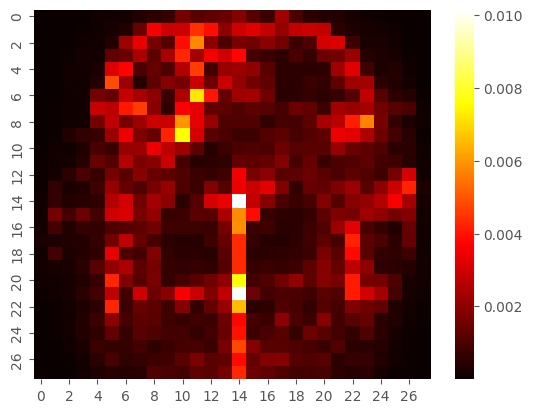

In [60]:
sns.heatmap(rf.feature_importances_.reshape(28,28),cmap='hot')

(-0.5, 27.5, 27.5, -0.5)

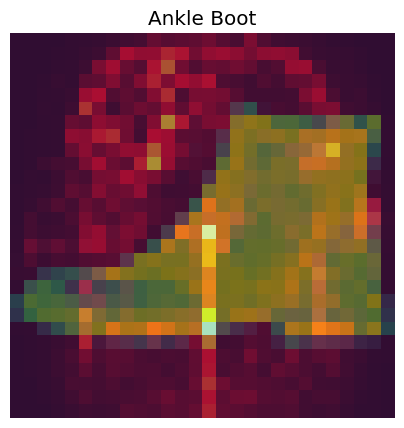

In [70]:
idx = 0
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
plt.imshow(X_train.loc[idx].values.reshape(28,28),cmap='viridis',alpha=0.9)
plt.imshow(rf.feature_importances_.reshape(28,28),cmap='hot',alpha=0.5)
plt.title(y_cols[y_train.loc[idx]])
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

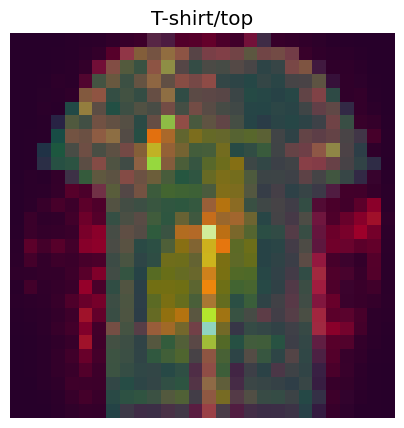

In [72]:
idx = 0
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
plt.imshow(X_val.loc[idx].values.reshape(28,28),cmap='viridis',alpha=1.0)
plt.imshow(rf.feature_importances_.reshape(28,28),cmap='hot',alpha=0.5)
plt.title(y_cols[y_val.loc[idx]])
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

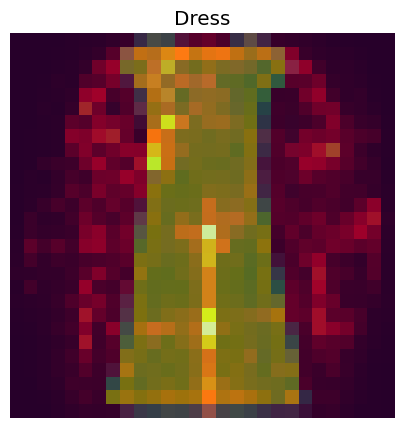

In [71]:
idx = 99
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
plt.imshow(X_test.loc[idx].values.reshape(28,28),cmap='viridis',alpha=1.0)
plt.imshow(rf.feature_importances_.reshape(28,28),cmap='hot',alpha=0.5)
plt.title(y_cols[y_test.loc[idx]])
plt.axis("off")

## VOTING CLASSIFIER

## HARD VOTING

In [103]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ("logistic",best_logistic_model),
    # ("svm",best_svm_model),
    ('rf',best_rf_model)
]

hard_vote = VotingClassifier(estimators=estimators,n_jobs=-1)

In [104]:
hard_vote.fit(X_train_scaled,y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, verbose=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_leaf_nodes=9,
                                                     n_estimators=200,
                                                     random_state=42))],
                 n_jobs=-1)

In [108]:
accuracy_score(y_val,hard_vote.predict(X_val_scaled))

0.5131

In [109]:
accuracy_score(y_test,hard_vote.predict(X_test_scaled))

0.5171

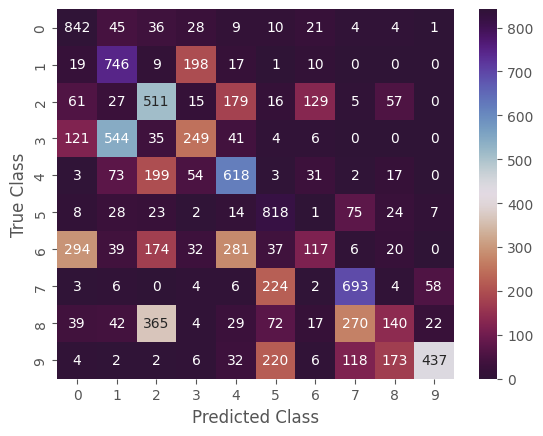

In [112]:
display_cmf(hard_vote.predict(X_test_scaled),y_test)

In [153]:
hard_vote_preds = list(hard_vote.transform(X_test_scaled))
hard_vote_preds = [list(val) for val in hard_vote_preds]
hard_votes_list = []

for idx,val in enumerate(hard_vote_preds):
    val.append(y_test[idx])
    hard_votes_list.append(val)

In [160]:
estimators_name = [i[0] for i in hard_vote.estimators] + ['True Value']
hard_vote_df = pd.DataFrame(hard_votes_list,columns=estimators_name)
hard_vote_df.head()

,logistic,rf,True Value
0,0,0,0
1,3,1,1
2,8,6,2
3,6,0,2
4,4,1,3


## SOFT VOTING

In [113]:
soft_vote = VotingClassifier(estimators=estimators,voting="soft")

soft_vote.fit(X_train_scaled,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   48.2s finished


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 multi_class='multinomial',
                                                 n_jobs=-1, verbose=10)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_leaf_nodes=9,
                                                     n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [119]:
soft_vote.transform(X_val_scaled).shape

(10000, 20)

In [138]:
accuracy_score(y_test,soft_vote.predict(X_test_scaled))

0.5066

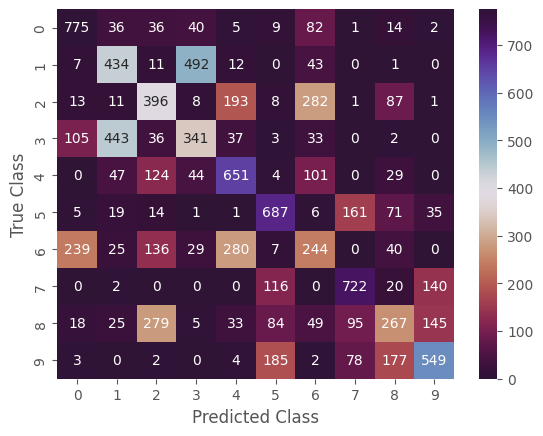

In [139]:
display_cmf(soft_vote.predict(X_test_scaled),y_test)